In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_parking = pd.read_csv('data/parking/parkingNYC_Jan2025.csv')
df_codes = pd.read_csv('data/parking/Parking_ViolationCodes_January2020.csv')

/var/folders/46/fdrjqjdn3jq9yg03908v7r_80000gn/T/ipykernel_39145/786070329.py:5: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_parking = pd.read_csv('data/parking/parkingNYC_Jan2025.csv')


In [90]:
df_codes.columns

Index(['VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'Manhattan  96th St. & below\n(Fine Amount $)',
       'All Other Areas\n(Fine Amount $)'],
      dtype='object')

In [91]:
df_parking['Violation Code'] = df_parking['Violation Code'].astype(int)
df_codes['Violation Code'] = df_codes['VIOLATION CODE'].astype(int)
df = df_parking.merge(
    df_codes[['Violation Code', 'VIOLATION DESCRIPTION', 'Manhattan  96th St. & below\n(Fine Amount $)']], 
    on='Violation Code', 
    how='left'
)

In [92]:
df['Fine'] = pd.to_numeric(df['Manhattan  96th St. & below\n(Fine Amount $)'], errors='coerce')

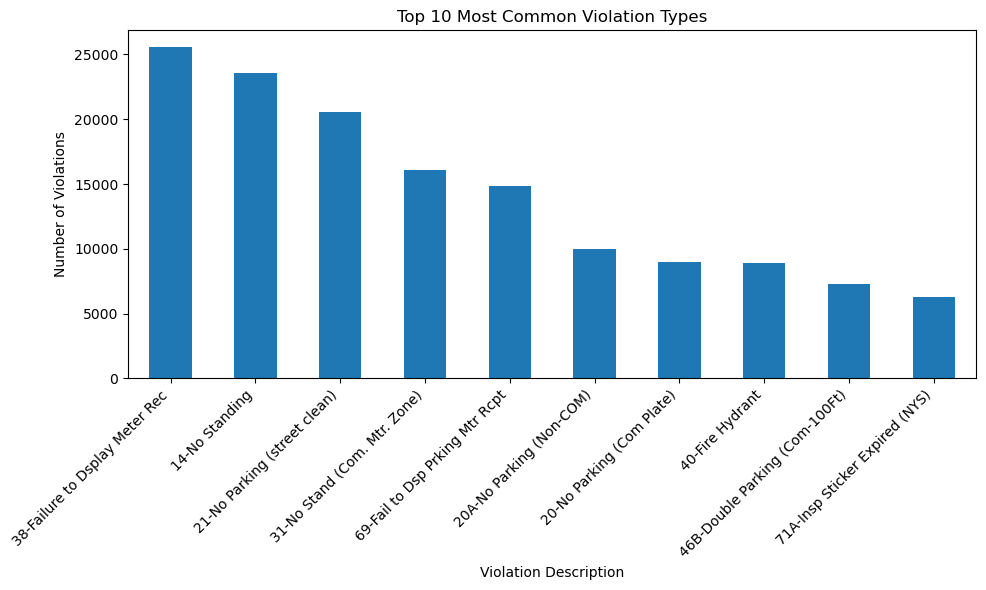

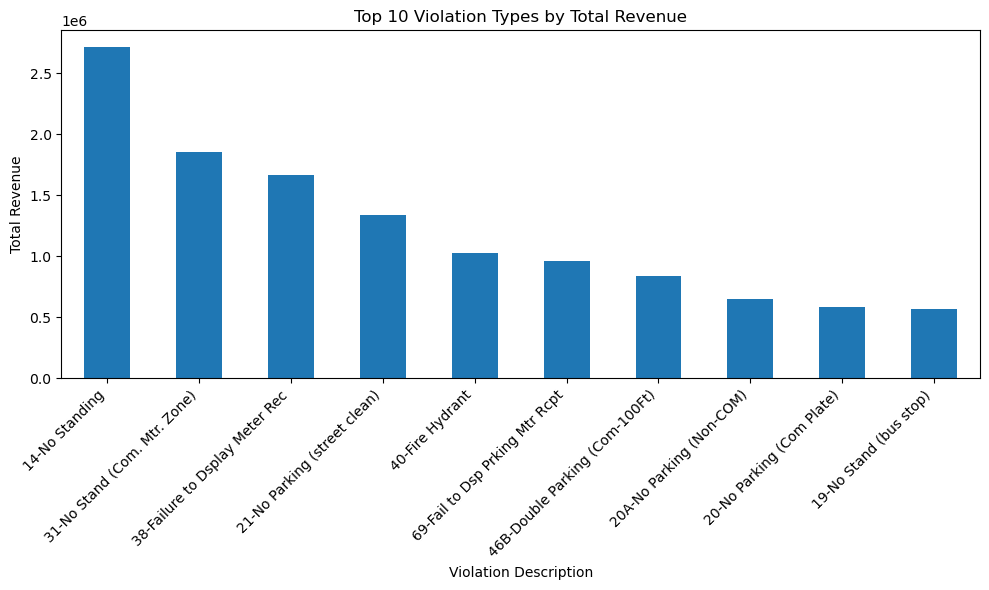

Top 10 Violations by Count:
Violation Description
38-Failure to Dsplay Meter Rec    25583
14-No Standing                    23598
21-No Parking (street clean)      20547
31-No Stand (Com. Mtr. Zone)      16084
69-Fail to Dsp Prking Mtr Rcpt    14830
20A-No Parking (Non-COM)          10020
20-No Parking (Com Plate)          9010
40-Fire Hydrant                    8926
46B-Double Parking (Com-100Ft)     7309
71A-Insp Sticker Expired (NYS)     6303
Name: count, dtype: int64

Top 10 Violations by Revenue:
Violation Description
14-No Standing                    2713770.0
31-No Stand (Com. Mtr. Zone)      1849660.0
38-Failure to Dsplay Meter Rec    1662895.0
21-No Parking (street clean)      1335555.0
40-Fire Hydrant                   1026490.0
69-Fail to Dsp Prking Mtr Rcpt     963950.0
46B-Double Parking (Com-100Ft)     840535.0
20A-No Parking (Non-COM)           651300.0
20-No Parking (Com Plate)          585650.0
19-No Stand (bus stop)             571435.0
Name: Fine, dtype: float64


In [93]:
violation_counts = df['Violation Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
violation_counts.plot(kind='bar')
plt.ylabel('Number of Violations')
plt.title('Top 10 Most Common Violation Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Top 10 Violation Types by Revenue ---
# Calculate total revenue per violation type
revenue = df.groupby('Violation Description')['Fine'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
revenue.plot(kind='bar')
plt.ylabel('Total Revenue')
plt.title('Top 10 Violation Types by Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# For reference, you might also print out the rankings:
print("Top 10 Violations by Count:")
print(violation_counts)
print("\nTop 10 Violations by Revenue:")
print(revenue)

In [94]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'issue_date', 'year', 'month', 'da

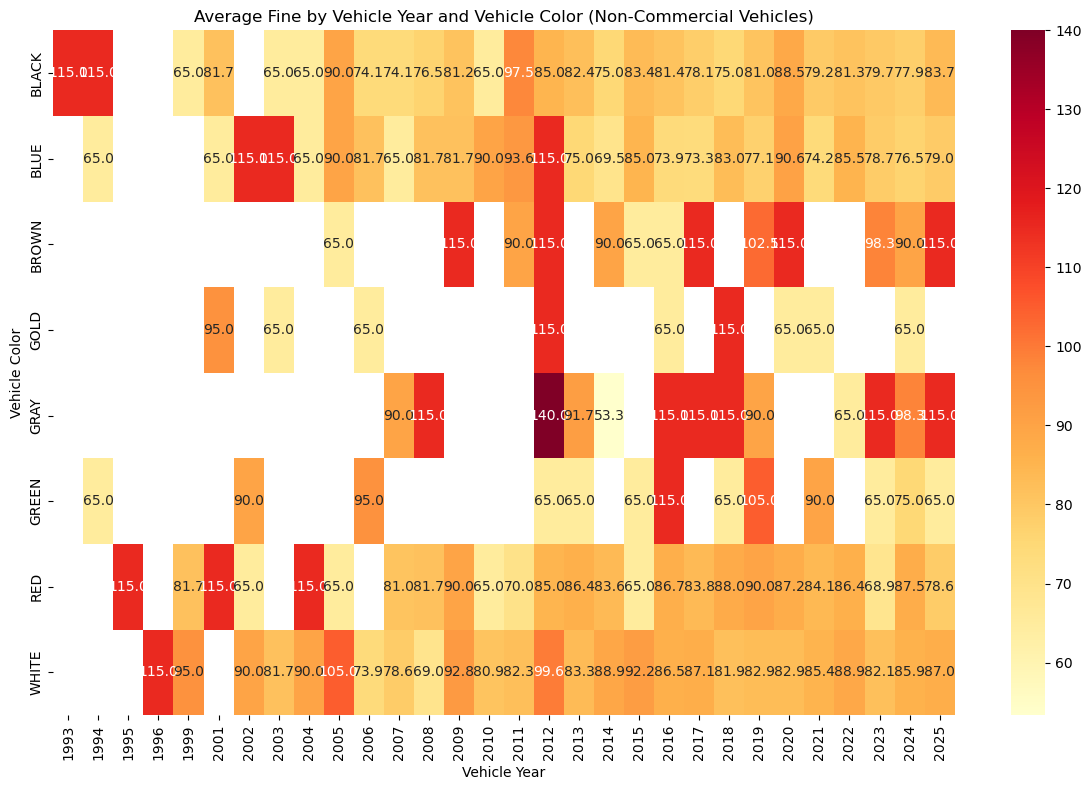

In [95]:
df_non_commercial = df[df['Plate Type'] == 'PAS']
import seaborn as sns
df_filtered = df_non_commercial[
    (df_non_commercial['Vehicle Year'] >= 1990) & 
    (df_non_commercial['Vehicle Year'] <= 2025)
]
# Example: limit to a handful of common colors
common_colors = ['BLACK', 'WHITE', 'GRAY', 'SILVER', 'RED', 
                 'BLUE', 'GREEN', 'BROWN', 'BEIGE', 'GOLD']
df_filtered = df_filtered[df_filtered['Vehicle Color'].isin(common_colors)]

# 2. Compute average fine by (Color, Year)
avg_fine = df_filtered.groupby(['Vehicle Color', 'Vehicle Year'])['Fine'].mean().reset_index()

# 3. Pivot so that rows = Vehicle Color, columns = Vehicle Year, values = Average Fine
heat_data = avg_fine.pivot(index='Vehicle Color', columns='Vehicle Year', values='Fine')

# 4. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heat_data, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title('Average Fine by Vehicle Year and Vehicle Color (Non-Commercial Vehicles)')
plt.xlabel('Vehicle Year')
plt.ylabel('Vehicle Color')
plt.tight_layout()
plt.show()

Findings: 
1 The average fines vary across different vehicle years and colors
2 Some color–year pairs (for example early 2020s) show higher average fines.
3 Some of the lighter cells may reflect very few tickets issued (no data or less reliable averages).

In [96]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import shapely.geometry

gdf_precincts = gpd.read_file('data/police_precincts/geojson/NYC_police_precincts_Mar2025.json')
manhattan_box = shapely.geometry.box(-74.02, 40.70, -73.93, 40.88)

gdf_precincts.head

<bound method NDFrame.head of     OBJECTID  Precinct   Shape__Area  Shape__Length  \
0          1         1  4.728475e+07   80093.490309   
1          2         5  1.809477e+07   18807.080607   
2          3         6  2.214302e+07   27255.991120   
3          4         7  1.836663e+07   17287.655061   
4          5         9  2.139539e+07   19772.510741   
..       ...       ...           ...            ...   
72        73       115  1.141415e+08   60082.476284   
73        74       116  1.644177e+08   73462.652558   
74        75       120  2.323334e+08   92949.901858   
75        76       121  4.755776e+08  136811.464636   
76        77       122  4.548466e+08  154846.589526   

                                             geometry  
0   MULTIPOLYGON (((-74.04388 40.6902, -74.04351 4...  
1   POLYGON ((-73.98864 40.72294, -73.98869 40.722...  
2   POLYGON ((-74.00915 40.74252, -74.00895 40.742...  
3   POLYGON ((-73.97346 40.71897, -73.97357 40.718...  
4   POLYGON ((-73.97161 40.72

/var/folders/46/fdrjqjdn3jq9yg03908v7r_80000gn/T/ipykernel_39145/1036204900.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_manhattan = gdf_precincts[gdf_precincts.centroid.within(manhattan_box)]
/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


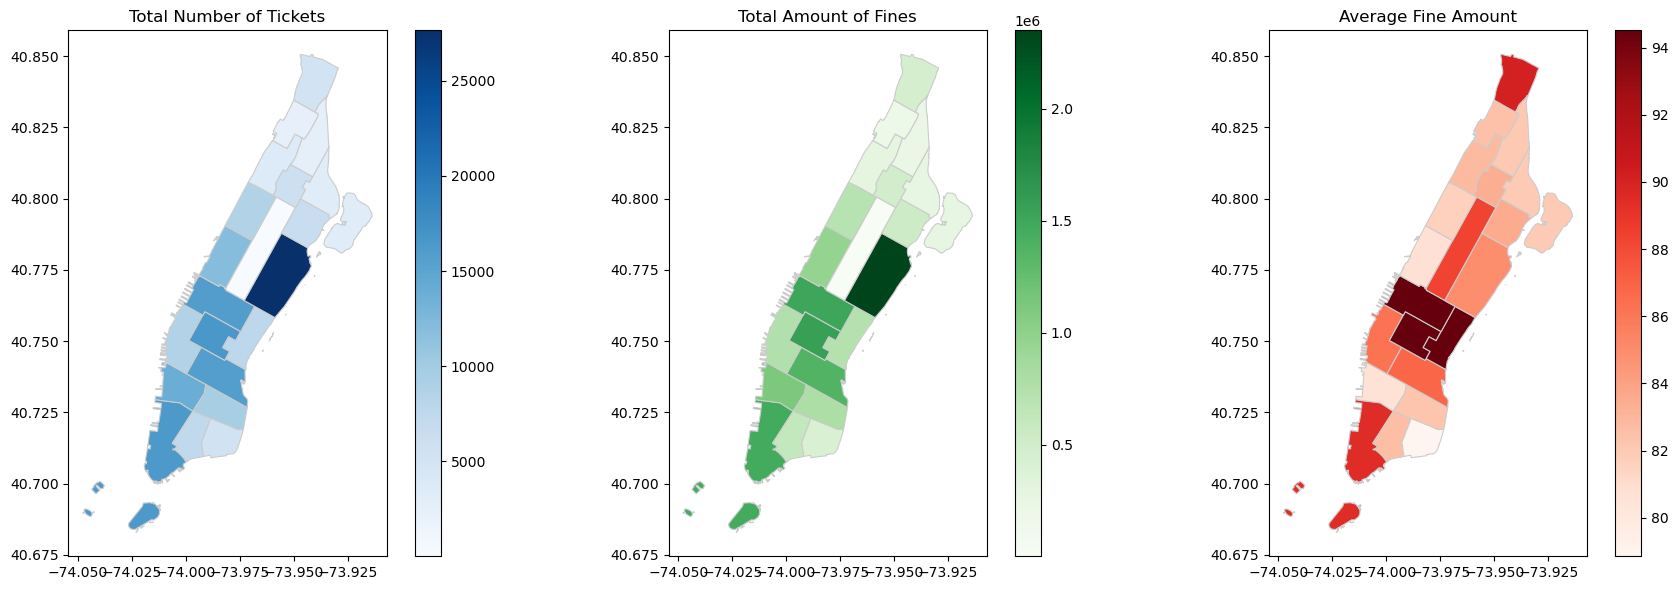

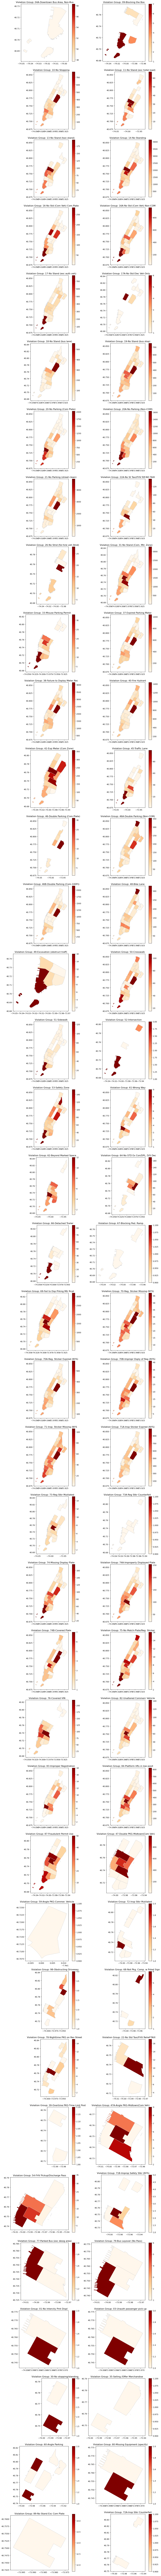

In [97]:
gdf_manhattan = gdf_precincts[gdf_precincts.centroid.within(manhattan_box)]

df['Precinct'] = df['Violation Precinct']

# --- Part (a): Aggregate Data by Precinct ---
# Compute total tickets and total fines per precinct:
precinct_stats = df.groupby('Precinct').agg(
    ticket_count=('Precinct', 'count'),
    total_fine=('Fine', 'sum')
).reset_index()
precinct_stats['avg_fine'] = precinct_stats['total_fine'] / precinct_stats['ticket_count']

# Ensure that the "Precinct" column types match between your data and the precinct boundaries.
gdf_manhattan['Precinct'] = gdf_manhattan['Precinct'].astype(int)
precinct_stats['Precinct'] = precinct_stats['Precinct'].astype(int)

# Merge the aggregated stats with Manhattan precinct geometries
gdf_stats = gdf_manhattan.merge(precinct_stats, on='Precinct', how='left')

# --- 3. Produce Choropleth Maps for Part (a) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Map 1: Total Number of Tickets
gdf_stats.plot(column='ticket_count', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('Total Number of Tickets')

# Map 2: Total Amount of Fines
gdf_stats.plot(column='total_fine', cmap='Greens', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('Total Amount of Fines')

# Map 3: Average Fine Amount
gdf_stats.plot(column='avg_fine', cmap='Reds', linewidth=0.8, ax=axes[2], edgecolor='0.8', legend=True)
axes[2].set_title('Average Fine Amount')

plt.tight_layout()
plt.show()

# --- Part (b): Faceted Maps by Violation Group ---
# Aggregate violation counts per precinct and violation_group:
group_stats = df.groupby(['Precinct', 'Violation Description']).size().reset_index(name='ticket_count')

# Merge with Manhattan precinct boundaries
gdf_violation = gdf_manhattan.merge(group_stats, on='Precinct', how='left')

# Determine unique violation groups
violation_groups = gdf_violation['Violation Description'].dropna().unique()
n_groups = len(violation_groups)
ncols = 2  # Adjust the number of columns in the facet grid as needed
nrows = (n_groups + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 5))
axes = axes.flatten()

for i, group in enumerate(violation_groups):
    subset = gdf_violation[gdf_violation['Violation Description'] == group]
    subset.plot(column='ticket_count', cmap='OrRd', linewidth=0.8, ax=axes[i], edgecolor='0.8', legend=True)
    axes[i].set_title(f'Violation Group: {group}')

# Remove any extra subplots if there are leftover axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

The total number of tickets and total amount of fines track similarly, but precincts with relatively fewer tickets can still show high total fines if those violations are expensive.

The average fine can be skewed by a small number of high-penalty tickets, so it doesn’t always reflect overall enforcement activity.

The total amount of fines is often the most representative because it balances how many tickets were issued with how severe the penalties were.

In [100]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


df_hydrant = df[(df['Violation Code'] == 40) & (df['Violation Precinct'] == 19)].copy()


df_hydrant['full_address'] = (df_hydrant['House Number'].astype(str) + ' ' + 
                                df_hydrant['Street Name'] + ', Upper East Side, Manhattan, NY')


df_hydrant = df_hydrant.head(500).reset_index(drop=True)



geolocator = Nominatim(user_agent="parking_app", timeout=10)


geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries=5, error_wait_seconds=2)

def get_lat_lon(address):
    try:
        location = geocode(address)
        if location:
            return pd.Series({'latitude': location.latitude, 'longitude': location.longitude})
    except Exception as e:
        print(e)
    return pd.Series({'latitude': None, 'longitude': None})


geocoded = df_hydrant['full_address'].apply(get_lat_lon)
df_geocoded = pd.concat([df_hydrant, geocoded], axis=1)


print(df_geocoded[['Summons Number', 'House Number', 'Street Name', 'full_address', 'latitude', 'longitude']].head())


   Summons Number House Number Street Name  \
0      9175839120            N   E 83rd St   
1      9175839179          527   E 78th St   
2      9175839192          513   E 75th St   
3      9176447868            N   E 74th St   
4      9176447972          303   E 93rd St   

                                    full_address   latitude  longitude  
0    N E 83rd St, Upper East Side, Manhattan, NY  40.776282 -73.954015  
1  527 E 78th St, Upper East Side, Manhattan, NY  40.770100 -73.949246  
2  513 E 75th St, Upper East Side, Manhattan, NY  40.768545 -73.951226  
3    N E 74th St, Upper East Side, Manhattan, NY  40.770973 -73.959431  
4  303 E 93rd St, Upper East Side, Manhattan, NY  40.782254 -73.947980  


In [101]:
import folium

map_center = [40.7736, -73.9566]
m = folium.Map(location=map_center, zoom_start=14)


for _, row in df_geocoded.iterrows():
   
    popup_info = (f"Summons: {row['Summons Number']}<br>"
                  f"Vehicle Make: {row['Vehicle Make']}<br>"
                  f"Violation: {row['Violation Description']}")
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=popup_info,
        ).add_to(m)

# Display the interactive map
m.save("hydrant_violations_map.html")


In [102]:
# Define car brands 
luxury_brands = ['BMW', 'MERCEDES', 'AUDI', 'LEXUS', 'PORSCHE', 'JAGUAR', 'LAND ROVER', 'INFINITI', 'ACURA']
df_geocoded['luxury_car'] = df_geocoded['Vehicle Make'].str.upper().isin(luxury_brands)

# updated map
m2 = folium.Map(location=map_center, zoom_start=14)

# Define marker colors
def marker_color(is_luxury):
    return 'red' if is_luxury else 'blue'


for _, row in df_geocoded.iterrows():
    popup_info = (f"Summons: {row['Summons Number']}<br>"
                  f"Vehicle Make: {row['Vehicle Make']}<br>"
                  f"Violation: {row['Violation Description']}<br>"
                  f"Luxury Car: {'Yes' if row['luxury_car'] else 'No'}")
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=popup_info,
            icon=folium.Icon(color=marker_color(row['luxury_car']))
        ).add_to(m2)


legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">
&nbsp;<b>Car Type</b><br>
&nbsp;<i class="fa fa-map-marker fa-2x" style="color:red"></i>&nbsp;Luxury<br>
&nbsp;<i class="fa fa-map-marker fa-2x" style="color:blue"></i>&nbsp;Non-Luxury
</div>
"""
m2.get_root().html.add_child(folium.Element(legend_html))
m2.save("hydrant_violations_luxury_map.html")


In [103]:
from folium.plugins import MarkerCluster


m3 = folium.Map(location=map_center, zoom_start=14)
marker_cluster = MarkerCluster().add_to(m3)

for _, row in df_geocoded.iterrows():
    popup_info = (f"Summons: {row['Summons Number']}<br>"
                  f"Vehicle Make: {row['Vehicle Make']}<br>"
                  f"Violation: {row['Violation Description']}<br>"
                  f"Luxury Car: {'Yes' if row['luxury_car'] else 'No'}")
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=popup_info,
            icon=folium.Icon(color=marker_color(row['luxury_car']))
        ).add_to(marker_cluster)


m3.get_root().html.add_child(folium.Element(legend_html))
m3.save("hydrant_violations_clustered_map.html")
